In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
customer_data = pd.read_csv('Mall_Customers.csv')

In [11]:
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Annual Income (Thousand Rupees)
0,1,Male,19,15,39,1115.25
1,2,Male,21,15,81,1115.25
2,3,Female,20,16,6,1189.60
3,4,Female,23,16,77,1189.60
4,5,Female,31,17,40,1263.95


In [7]:
customer_data['Annual Income (Thousand Rupees)'] = customer_data['Annual Income (k$)'].apply(lambda x: x*74.35)

In [8]:
customer_data['Annual Income (Thousand Rupees)'].head()

0    1115.25
1    1115.25
2    1189.60
3    1189.60
4    1263.95
Name: Annual Income (Thousand Rupees), dtype: float64

In [10]:
customer_data.drop('Annual Income (Rupees)', axis='columns', inplace=True)

In [17]:
customer_data.isnull().sum()

CustomerID                         0
Gender                             0
Age                                0
Annual Income (k$)                 0
Spending Score (1-100)             0
Annual Income (Thousand Rupees)    0
dtype: int64

In [18]:
X = customer_data.iloc[:,[3,4]].values

In [19]:
#Choosing the right number of clusters using WCSS
#WCSS = Within Cluster Sum of Squares (Lower the better) choose the no.of clusters with lowest WCSS

wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

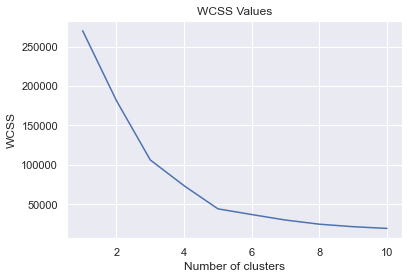

In [20]:
#plot an elbow graph

sns.set()
plt.plot(range(1,11), wcss)
plt.title('WCSS Values')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [21]:
#We have 2 elbow points (points of signifant drop) we choose 5 clusters since after that there is no 
#significant drop after that

kmeans = KMeans(n_clusters=5, init='k-means++', random_state=2)

#return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)

print(Y)

[2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2
 4 2 4 2 4 2 0 2 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 3 1 3 0 3 1 3 1 3 0 3 1 3 1 3 1 3 1 3 0 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3]


Text(0, 0.5, 'Spending Score')

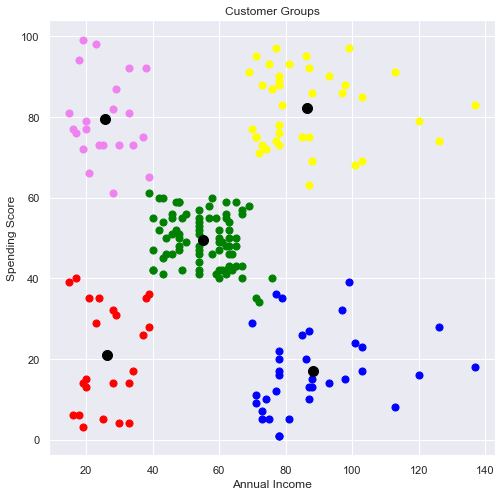

In [23]:
#Visualize all the clusters

plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='blue', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='red', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='yellow', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='violet', label='Cluster 5')

#plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='black', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')

AttributeError: 'numpy.ndarray' object has no attribute 'predict'